# Freesound Pitch Estimation Assessment
In this document the quality of the Freesound Pitch estimation algorithm applied to single-note sounds will be assessed. From this assessment possible improvements to the algorithm or the usage of the algorithm are proposed and assessed.

In [1]:
# import some libraries:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

# load some utillity functions
import util as ut
# load results:
from loadResults import *

importing functions
loading data
loading Freesound data
done


# 0: Introduction
In this document the performance of the pitch estimation algorithm used by Freesound to estimate the pitches of sounds on single-note sounds will be assessed. This assessment will consist of a observation of the quality of the estimation, followed by a discussion on factors able to predict the quality of this estimation. Lastly possible improvements to the algorithm or the useage of the algorithm will be proposed and discussed.

# 1: The Sounds
The sounds used in this assessment come partly form Freesound and partly from two non-Freesound sources. The Freesound sounds come from two different sources: the sounds uploaded by the users Carlos Vaquero and the sounds containing the tag 'good-sounds'. The non-Freesound sounds come from two sources mentioned in the masterthesis "Improving the description of instrumental sounds by using ontologies and automatic content analysis" by Carlos Vaquero (Vaquero, 2012). Namely sounds from the Philharmonia Orchestra [$REF$] and the piano pack from The University of Iowa Musical Instrument Samples (or as they call it MIS) [$REF$]. 

## 1.1: Contents of the sounds
All of the sounds are single-note sounds from real instruments. The sounds from the user Carlos Vaquero are recordings from different western instruments containting, among others, acoustic guitar, recorder, bassoon, several bowed instruments (played plucked and bowed with different techniques). The sounds with the tag 'good-sounds' are also single-notes of several western instruments, but only played with a 'normal' playing technique. The sounds from the Philharmonia Orchestra are several (vast) collections of sounds from different instruments of the orchestra, played in a wide range of techniques. The sounds chosen fro m the Philharmonia Orchestra are the cello, clarinet, guitar and violin. Lastly the sounds taken from the University of IOWA include piano, cello, trumpet, marimba and xylophone. All the sounds had to be checked to make sure no sounds with multiple pitches or ambiguous pitches were included into the calculation.

Below the amount of sounds contained in each pack as well as the distribution of the annotated pitches are shown:

Amount of sounds per source:
Freesound:
	Carlos		470 sounds
	good-sounds:	113 sounds
non-Freesound:
	Philharmonia:	2973 sounds
	IOWA:		639 sounds

Total:			4195 sounds

Annotated pitch distributions:


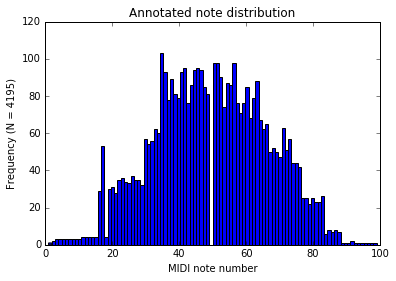

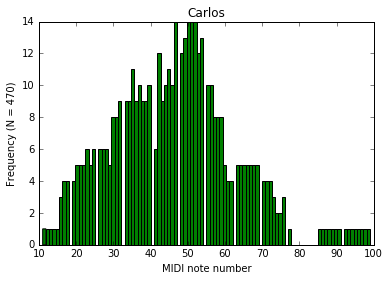

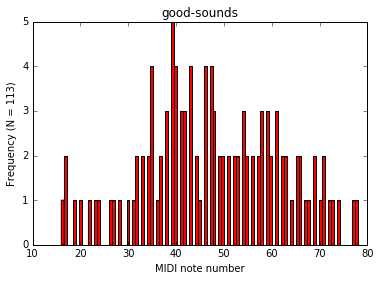

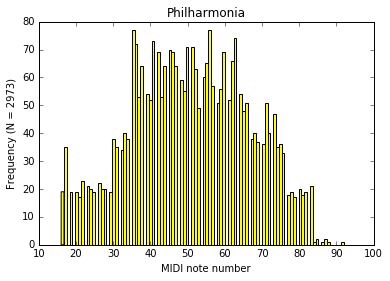

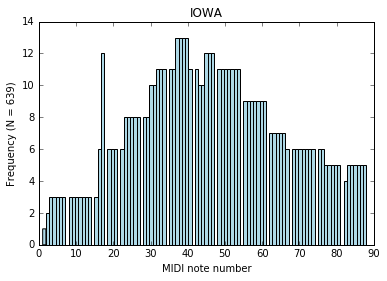

In [2]:
print "Amount of sounds per source:"
print "Freesound:\n\tCarlos\t\t" + str(csN) + " sounds\n\tgood-sounds:\t" + str(gsN) + " sounds"
print "non-Freesound:\n\tPhilharmonia:\t" + str(phN) + " sounds\n\tIOWA:\t\t" + str(iwN) + " sounds\n" 
N = csN + gsN + phN + iwN
print "Total:\t\t\t" + str(N) + " sounds\n"
print "Annotated pitch distributions:"
pTag = pool['annotated.pitch']; midi = ut.freq2midi(pTag)
plt.hist(midi, bins=100); plt.title("Annotated note distribution"); plt.xlabel("MIDI note number"); plt.ylabel("Frequency (N = " + str(N) + ")");  plt.show();
plt.hist(midi[:csN], bins=100, color='green'); plt.title("Carlos"); plt.xlabel("MIDI note number"); plt.ylabel("Frequency (N = " + str(csN) + ")"); plt.show();
plt.hist(midi[csN:csN+gsN], bins=100, color='red'); plt.title("good-sounds"); plt.xlabel("MIDI note number"); plt.ylabel("Frequency (N = " + str(gsN) + ")"); plt.show();
plt.hist(midi[csN+gsN:csN+gsN+phN], bins=100, color='yellow'); plt.title("Philharmonia"); plt.xlabel("MIDI note number"); plt.ylabel("Frequency (N = " + str(phN) + ")"); plt.show();
plt.hist(midi[csN+gsN+phN:], bins=100, color='lightblue'); plt.title("IOWA"); plt.xlabel("MIDI note number"); plt.ylabel("Frequency (N = " + str(iwN) + ")"); plt.show();

### 1.2 Comparison of Freesound and locally computed data
The data is computated locally trying to reproduce the data obtained from Freesound. Ideally the values obtained trough local calculation and the central calculation at uploadtime will be the same, although some small differences may occur. Below are the differences obtained between the Freesounddata and the locally calculated data.

The Freesound pitch estimation is done using the pitchYinFFT algorithm contained in the Essentia library [$REF$]. The pitchYinFFT is a optimalisation for reduced calculation time of the YIN algorithm. The performance of the pitch estimation algortihm will be assessed by comparing the pitch estimated by the algorithm against the pitch annotated for that sound, taken either from the filename of the descriptions and/or tags of the sounds.

Pitch estimation:
	Freesound:	μ: 411.667 Hz	(σ: 305.264 Hz)
	Local:		μ: 417.041 Hz	(σ: 309.538 Hz)
Point-wise difference:	11.0239 Hz

Confidence:
	Freesound:	μ: 0.734088	(σ: 0.152733)
	Local:		μ: 0.726825	(σ: 0.155668)
Point-wise difference:	0.00783782

Confidence:
	Freesound:	μ: 0.468032	(σ: 0.135647)
	Local:		μ: 0.467246	(σ: 0.135743)
Point-wise difference:	0.00548843



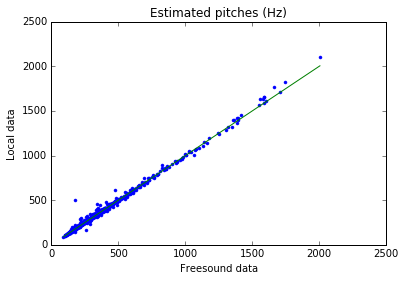

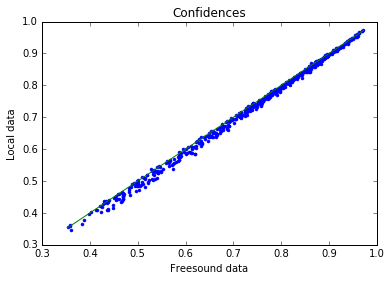

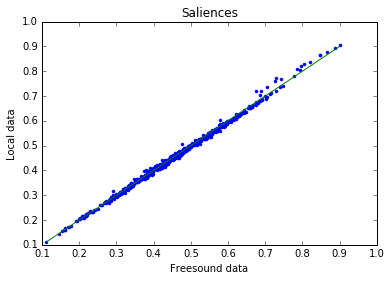

Minimal and maximal values:
Estimated pitches:
	Freesound:	[89.9533Hz,	2004.75Hz]
	Local:		[89.1426Hz,	2105.35Hz]
Confidences:
	Freesound:	[0.353488,	0.971915]
	Local:		[0.34735,	0.974891]
Saliences:
	Freesound:	[0.111462,	0.900048]
	Local:		[0.109506,	0.906102]


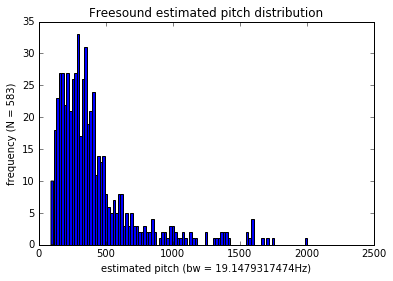

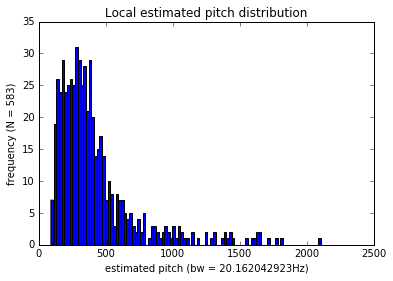

In [29]:
frs_pEst = frsPool['analysis.lowlevel.pitch.mean'];
loc_pEst = locPool['lowLevel.pitch.mean']
print "Pitch estimation:"
print "\tFreesound:\tμ: " + str(np.mean(frs_pEst)) + " Hz\t(σ: " + str(np.std(frs_pEst)) + " Hz)"
print "\tLocal:\t\tμ: " + str(np.mean(loc_pEst)) + " Hz\t(σ: " + str(np.std(loc_pEst)) + " Hz)"
print "Point-wise difference:\t" + str(np.mean(abs(frs_pEst - loc_pEst))) + " Hz\n"

frs_conf = frsPool['analysis.lowlevel.pitch_instantaneous_confidence.mean']
loc_conf = locPool['lowLevel.pitch_instantaneous_confidence.mean']
print "Confidence:"
print "\tFreesound:\tμ: " + str(np.mean(frs_conf)) + "\t(σ: " + str(np.std(frs_conf)) + ")"
print "\tLocal:\t\tμ: " + str(np.mean(loc_conf)) + "\t(σ: " + str(np.std(loc_conf)) + ")"
print "Point-wise difference:\t" + str(np.mean(abs(frs_conf - loc_conf))) + "\n"

frs_sal = frsPool['analysis.lowlevel.pitch_salience.mean']
loc_sal = locPool['lowLevel.pitch_salience.mean']
print "Confidence:"
print "\tFreesound:\tμ: " + str(np.mean(frs_sal)) + "\t(σ: " + str(np.std(frs_sal)) + ")"
print "\tLocal:\t\tμ: " + str(np.mean(loc_sal)) + "\t(σ: " + str(np.std(loc_sal)) + ")"
print "Point-wise difference:\t" + str(np.mean(abs(frs_sal - loc_sal))) + "\n"

plt.plot(frs_pEst, loc_pEst, '.'); plt.title('Estimated pitches (Hz)'); plt.xlabel('Freesound data'); plt.ylabel('Local data'); plt.plot([min(frs_pEst), max(frs_pEst)], [min(frs_pEst), max(frs_pEst)]); plt.show()
plt.plot(frs_conf, loc_conf, '.'); plt.title('Confidences'); plt.xlabel('Freesound data'); plt.ylabel('Local data');  plt.plot([min(frs_conf), max(frs_conf)], [min(frs_conf), max(frs_conf)]); plt.show()
plt.plot(frs_sal, loc_sal, '.'); plt.title('Saliences'); plt.xlabel('Freesound data'); plt.ylabel('Local data');  plt.plot([min(frs_sal), max(frs_sal)], [min(frs_sal), max(frs_sal)]); plt.show()

print "Minimal and maximal values:"
print "Estimated pitches:"
print "\tFreesound:\t[" + str(min(frs_pEst)) + "Hz,\t" + str(max(frs_pEst)) + "Hz]"
print "\tLocal:\t\t[" + str(min(loc_pEst)) + "Hz,\t" + str(max(loc_pEst)) + "Hz]"
print "Confidences:"
print "\tFreesound:\t[" + str(min(frs_conf)) + ",\t" + str(max(frs_conf)) + "]"
print "\tLocal:\t\t[" + str(min(loc_conf)) + ",\t" + str(max(loc_conf)) + "]"
print "Saliences:"
print "\tFreesound:\t[" + str(min(frs_sal)) + ",\t" + str(max(frs_sal)) + "]"
print "\tLocal:\t\t[" + str(min(loc_sal)) + ",\t" + str(max(loc_sal)) + "]"

hst = plt.hist(frs_pEst, bins=100); bw = hst[1][3]-hst[1][2]; plt.title("Freesound estimated pitch distribution"); plt.xlabel("estimated pitch (bw = " + str(bw) + "Hz)"); plt.ylabel("frequency (N = " + str(len(frs_pEst)) + ")"); plt.show();
hst = plt.hist(loc_pEst, bins=100); bw = hst[1][3]-hst[1][2]; plt.title("Local estimated pitch distribution"); plt.xlabel("estimated pitch (bw = " + str(bw) + "Hz)"); plt.ylabel("frequency (N = " + str(len(loc_pEst)) + ")"); plt.show();

The data obtained from Freesound and the locally computated data are similar enough to focus on the locally computed data in the rest of the assessment.

# 2: The Pitch Estimator Assessment
The Freesound pitch estimation is done using the pitchYinFFT algorithm contained in the Essentia library [$REF$]. The pitchYinFFT is a optimalisation for reduced calculation time of the YIN algorithm. The performance of the pitch estimation algortihm will be assessed by comparing the pitch estimated by the algorithm against the pitch annotated for that sound, taken either from the filename of the descriptions and/or tags of the sounds.

Firstly the correctness of the pitch estimation will be assessed. Secondly some possible factors which can predict the correctness of the estimation will be discussed, thus investigating possible improvements. The confidence measurements from the pitchYinFFT algorithm and the annotated pitches will be compared to the succes of the estimations and the values of some aural and musical descriptors will be correlated to the error values obtained in the assessment.

## 2.1: Performance of the Pitch Estimation
In the next section the results of the pitch estimation are presented and some inferences from these results are discussed.

Pitch distributions


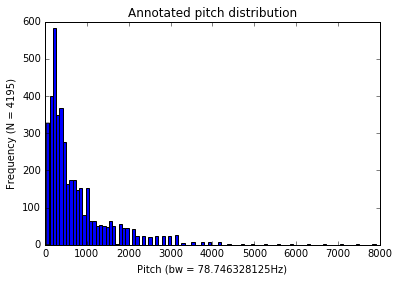

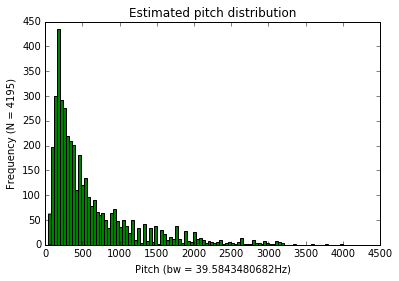

In [32]:
print "Pitch distributions"
pTag = pool['annotated.pitch']; pEst = pool['lowLevel.pitch.median']
hst = plt.hist(pTag, bins=100); bw = hst[1][3]-hst[1][2]; plt.title('Annotated pitch distribution'); plt.xlabel('Pitch (bw = ' + str(bw) + 'Hz)'); plt.ylabel('Frequency (N = '+str(len(pTag)) + ')'); plt.show()
hst = plt.hist(pEst, bins=100, color='green'); bw = hst[1][3]-hst[1][2];  plt.title('Estimated pitch distribution'); plt.xlabel('Pitch (bw = ' + str(bw) + 'Hz)'); plt.ylabel('Frequency (N = '+str(len(pEst)) + ')'); plt.show()

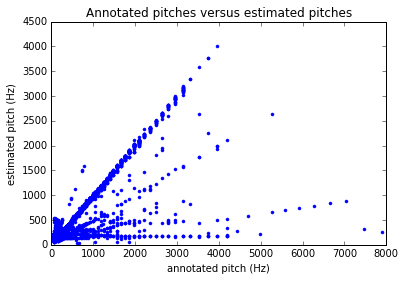

Mean error (annotated - estimated):	108.923Hz	(σ: 504.059)
Median error:				-0.62513Hz


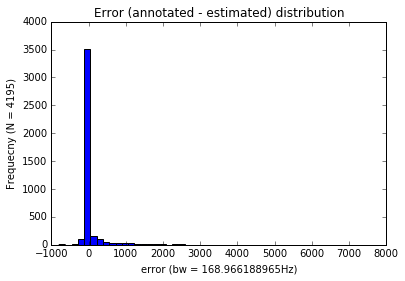

83.5518474374% of the errors fall within the band:	[-119.851918945Hz,	49.1142700195Hz]

Precentage of sounds with annotated lower than estimated pitch: 58.4505363528%

Pitches:
	Annotated:	μ: 711.672Hz	(σ: 749.018Hz)	median: 440.0Hz
	estimated:	μ: 602.749Hz	(σ: 584.43Hz)	median: 390.253Hz



In [80]:
plt.plot(pTag, pEst, '.'); plt.title('Annotated pitches versus estimated pitches'); plt.xlabel('annotated pitch (Hz)'); plt.ylabel('estimated pitch (Hz)'); plt.show();
err = pTag - pEst; 
print 'Mean error (annotated - estimated):\t' + str(np.mean(err)) + 'Hz\t(σ: ' + str(np.std(err)) + ')'
print 'Median error:\t\t\t\t' + str(np.median(err)) + 'Hz';
hst = errHist = plt.hist(err, bins=50); bw = hst[1][3]-hst[1][2]; plt.title("Error (annotated - estimated) distribution"); plt.xlabel('error (bw = ' + str(bw) + 'Hz)'); plt.ylabel('Frequecny (N = ' + str(len(err)) + ')'); 
maxBand = np.where(hst[0] == max(hst[0]))[0]; lbound = hst[1][maxBand][0]; rbound = hst[1][maxBand+1][0];

plt.show();
print str(hst[0][maxBand][0] / float(np.sum(hst[0])) * 100) + "% of the errors fall within the band:\t[" + str(lbound) + "Hz,\t" + str(rbound) + "Hz]\n"
print "Precentage of sounds with annotated lower than estimated pitch: " + str(len(np.where(err < 0)[0]) / float(len(err)) * 100) + "%\n"

print 'Pitches:\n\tAnnotated:\tμ: ' + str(np.mean(pTag)) + 'Hz\t(σ: ' + str(np.std(pTag)) + 'Hz)\tmedian: ' + str(np.median(pTag)) + 'Hz'
print '\testimated:\tμ: ' + str(np.mean(pEst)) + 'Hz\t(σ: ' + str(np.std(pEst)) + 'Hz)\tmedian: ' + str(np.median(pEst)) + 'Hz\n'



Most errors fall within a bandwidth close to $0 Hz$. However the mean of the point-wise errors is around $108Hz$. Looking at the mean error and the mean and median values of the annotated versus the estimated pitches the pitch estimator tends to estimate pitches lower than the anntotation. However when the median value of the point-wise errors and the percentage of sounds with a higher annotation than estimation, suggest that there are some big differences where the estimation is cosiderably lower than the annotation. But the median of the point-wise errors lies very close to $0 Hz$ and thus no clear tendency to estimate too low or too high can be determined.

As pitch is clearly a human percept it is more usefull not to talk in terms of frequencies, but some other scale is preferred.

Equivalent Rectangluar Bandwidths


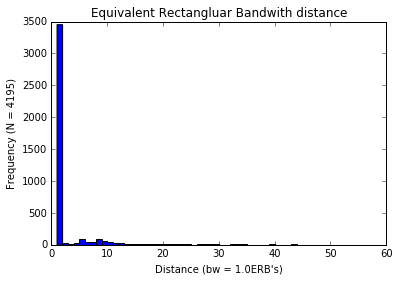

Mean ERB distance:	3.11823599523 ERB's	(σ: 6.14383330753 ERB's)
Median ERB distance:	1.0 ERB's

82.2884386174% of the trials fall within the band:	[1.0ERBs, 2.0ERBs]

Semitones


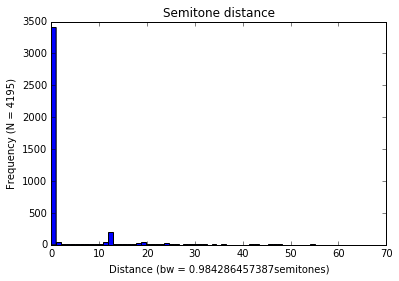

Mean semitone distance:		3.57914720127 st	(σ: 8.94455769102 st)
Median semitone distance:	0.123691568676 st

81.2157330155% of the trials fall within the band:	[2.26671734871e-06st, 0.984288724104st]


In [252]:
print "Equivalent Rectangluar Bandwidths"
erb = abs(pa.ERBdist(pTag, pEst));
hst = plt.hist(erb, bins=51); bw = hst[1][3] - hst[1][2]; plt.title('Equivalent Rectangluar Bandwith distance'); plt.xlabel('Distance (bw = ' + str(bw) + "ERB's)"); plt.ylabel('Frequency (N = ' + str(len(erb)) + ')'); plt.show();
maxBand = np.where(hst[0] == max(hst[0]))[0];
print "Mean ERB distance:\t" + str(np.mean(erb)) + " ERB's\t(σ: " + str(np.std(erb)) + " ERB's)"
print "Median ERB distance:\t" + str(np.median(erb)) + " ERB's\n"
print str(hst[0][maxBand][0] / float(np.sum(hst[0])) * 100) + "% of the trials fall within the band:\t[" + str(hst[1][maxBand][0]) + "ERBs, " + str(hst[1][maxBand+1][0]) + "ERBs]\n"


print "Semitones"
st = abs(pa.semitoneDist(pTag, pEst));
hst = plt.hist(st, bins=61); bw = hst[1][3] - hst[1][2]; plt.title('Semitone distance'); plt.xlabel('Distance (bw = ' + str(bw) + "semitones)"); plt.ylabel('Frequency (N = ' + str(len(st)) + ')'); plt.show();
maxBand = np.where(hst[0] == max(hst[0]))[0];
print "Mean semitone distance:\t\t" + str(np.mean(st)) + " st\t(σ: " + str(np.std(st)) + " st)"
print "Median semitone distance:\t" + str(np.median(st)) + " st\n"
print str(hst[0][maxBand][0] / float(np.sum(hst[0])) * 100) + "% of the trials fall within the band:\t[" + str(hst[1][maxBand][0]) + "st, " + str(hst[1][maxBand+1][0]) + "st]"


As can be seen from the above histograms around $82$% of the estimations fall within the same ERB as the annotated pitch and $81$% of the estimations differ less than 1 semitone from the annotated pitch.
A common error in pitch estimations are ocatve errors (Gerhard, 2003), here the pitch is estimated to be a (sub) harmonic of the annotated pitch of the sound. In the semitone distance plot a clear peak can be seen in the band corresponding to a distance of $12$ semitones, which corresponds to a distance of one octave.

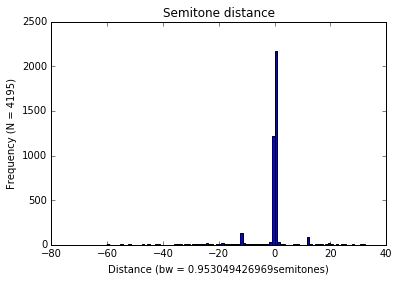

Around 6.74612634088% of the errors can be accounted for by octave errors
of which
	4.36233611442% are sub octave errors and;
	2.38379022646% are higher harmonic errors


In [253]:
st = pa.semitoneDist(pTag, pEst);
hst = plt.hist(st, bins=100); bw = hst[1][3] - hst[1][2]; plt.title('Semitone distance'); plt.xlabel('Distance (bw = ' + str(bw) + "semitones)"); plt.ylabel('Frequency (N = ' + str(len(st)) + ')'); plt.show();
octErr = pa.isOctErr(pTag, pEst)
print "Around " + str(len(np.where(octErr != 0)[0]) / float(len(octErr)) * 100) + "% of the errors can be accounted for by octave errors"
print "of which\n\t" + str(len(np.where(octErr < 0)[0]) / float(len(octErr)) * 100) + "% are sub octave errors and;\n\t" + str(len(np.where(octErr > 0)[0]) / float(len(octErr)) * 100) + "% are higher harmonic errors"


## 2.2: Predictors
Here some values returned by the pitch estimation algorithm are investigated to determine how well they predict the correctness of the estimation.

### 2.2.1: Confidence
The pitch estimator used returns a confidence measurement, this should be a measure for the quality of the estimation.

confidence
Mean confidence:	0.852037	(σ: 0.207613
Mean semitone distance: 


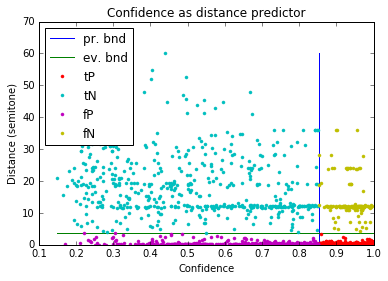

True Positive (confidence > mean confidence & distance < mean distance):	68.0810488677%
True Negative (confidence < mean confidence & distance > mean distance):	13.6829558999%

Confidence can predict:	81.7640047676% of the estimations correctly


In [255]:
print "confidence"
conf = pool['lowLevel.pitch_instantaneous_confidence.median']
conf_mu = pool['lowLevel.pitch_instantaneous_confidence.mean']
#plt.plot(conf, abs(st), '.'); plt.title('Confidence v.s. semitone distance'); plt.xlabel('Confidence'); plt.ylabel('Distance (semitone)'); plt.show();

print "Mean confidence:\t" + str(np.mean(conf)) + "\t(σ: " + str(np.std(conf));
print "Mean semitone distance: "
tP, tN, fP, fN = pa.predict(pr=conf, ev=abs(st), plot=1); plt.title('Confidence as distance predictor'); plt.xlabel('Confidence'); plt.ylabel('Distance (semitone)'); plt.show();
print "True Positive (confidence > mean confidence & distance < mean distance):\t" + str(len(tP) / float(len(st)) * 100) + "%"
print "True Negative (confidence < mean confidence & distance > mean distance):\t" + str(len(tN) / float(len(st)) * 100) + "%\n"
print "Confidence can predict:\t" + str((len(tP) + len(tN)) / float(len(st)) * 100) + "% of the estimations correctly"

In [231]:
print "variance in pYinFFT"

variance in pYinFFT


In [258]:
len(pool['name'])

4195